# Title: Exploratory Analysis of Cricket Player Performance in Test Matches

In [1]:
# Imported the dataset from Kaggle
# Dataset: Cricket Dataset Test.csv
# Source: Kaggle (URL:https://www.kaggle.com/datasets/mahendran1/icc-cricket/download?datasetVersionNumber=2)
# Citation: Author(s), "Cricket data," 2020, Owner-Mahendran Narayanan
#He further states that he got this data from Cricket Info using webscraping.
# License- Data files © Original Authors


In [2]:
import pandas as pd # Pandas is a data manipulation and analysis library.
import numpy as np #  Numerical computing and data processing library.
import matplotlib.pyplot as plt #  Matplotlib.pyplot is a visualization library.
import seaborn as sns # A library for visualizing statistical data.
from scipy.stats import pearsonr #  A function for calculating the Pearson correlation coefficient and the p-value.
from scipy.stats import f_oneway #  A one-way ANOVA test function.

In [3]:
df = pd.read_csv('test.csv')
# Reading the csv file that have been downloaded to my computer and uploaded to jupyter notebook

In [4]:
print(df.head(15))

    Unnamed: 0                 Player       Span  Mat Inns  NO   Runs    HS  \
0            0   SR Tendulkar (INDIA)  1989-2013  200  329  33  15921  248*   
1            1       RT Ponting (AUS)  1995-2012  168  287  29  13378   257   
2            2     JH Kallis (ICC/SA)  1995-2013  166  280  40  13289   224   
3            3   R Dravid (ICC/INDIA)  1996-2012  164  286  32  13288   270   
4            4          AN Cook (ENG)  2006-2018  161  291  16  12472   294   
5            5     KC Sangakkara (SL)  2000-2015  134  233  17  12400   319   
6            6       BC Lara (ICC/WI)  1990-2006  131  232   6  11953  400*   
7            7     S Chanderpaul (WI)  1994-2015  164  280  49  11867  203*   
8            8  DPMD Jayawardene (SL)  1997-2014  149  252  15  11814   374   
9            9        AR Border (AUS)  1978-1994  156  265  44  11174   205   
10          10         SR Waugh (AUS)  1985-2004  168  260  46  10927   200   
11          11    SM Gavaskar (INDIA)  1971-1987  12

In [5]:
# Check the dimensions of the DataFrame
print(df.shape)

(3001, 13)


In [6]:
# Get summary statistics of the dataset
print(df.describe())

        Unnamed: 0          Mat  Unnamed: 11
count  3001.000000  3001.000000          0.0
mean     24.491836    17.427191          NaN
std      14.437798    24.954654          NaN
min       0.000000     1.000000          NaN
25%      12.000000     2.000000          NaN
50%      24.000000     7.000000          NaN
75%      37.000000    21.000000          NaN
max      49.000000   200.000000          NaN


In [7]:
#Clearing the dataset for future task
# First removing the column containing serial numbers 

In [8]:
df.drop(df.columns[0], axis=1)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,100,50,0,Unnamed: 11
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14,NaN
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,NaN
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,NaN
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,NaN
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2996,CA Snedden (NZ),1947-1947,1,-,-,-,-,-,-,-,-,NaN
2997,VN Swamy (INDIA),1955-1955,1,-,-,-,-,-,-,-,-,NaN
2998,Usman Shinwari (PAK),2019-2019,1,-,-,-,-,-,-,-,-,NaN
2999,CM Willoughby (SA),2003-2003,2,-,-,-,-,-,-,-,-,NaN


In [9]:
df.head(10)
# Could not remove the coloumn using the above logic

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,100,50,0,Unnamed: 11
0,0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14,NaN
1,1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,NaN
2,2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,NaN
3,3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,NaN
4,4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,NaN
5,5,KC Sangakkara (SL),2000-2015,134,233,17,12400,319,57.4,38,52,11,NaN
6,6,BC Lara (ICC/WI),1990-2006,131,232,6,11953,400*,52.88,34,48,17,NaN
7,7,S Chanderpaul (WI),1994-2015,164,280,49,11867,203*,51.37,30,66,15,NaN
8,8,DPMD Jayawardene (SL),1997-2014,149,252,15,11814,374,49.84,34,50,15,NaN
9,9,AR Border (AUS),1978-1994,156,265,44,11174,205,50.56,27,63,11,NaN


In [10]:
df = df.drop('Unnamed: 0', axis=1)

In [11]:
df.head(10)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,100,50,0,Unnamed: 11
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14,NaN
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,NaN
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,NaN
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,NaN
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,NaN
5,KC Sangakkara (SL),2000-2015,134,233,17,12400,319,57.4,38,52,11,NaN
6,BC Lara (ICC/WI),1990-2006,131,232,6,11953,400*,52.88,34,48,17,NaN
7,S Chanderpaul (WI),1994-2015,164,280,49,11867,203*,51.37,30,66,15,NaN
8,DPMD Jayawardene (SL),1997-2014,149,252,15,11814,374,49.84,34,50,15,NaN
9,AR Border (AUS),1978-1994,156,265,44,11174,205,50.56,27,63,11,NaN


In [12]:
df = df.drop('Unnamed: 11', axis=1) #Removing the last coloumn as it contains no usable data
df=df.drop(index=2113)

In [13]:
df.head(10)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,100,50,0
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9
5,KC Sangakkara (SL),2000-2015,134,233,17,12400,319,57.4,38,52,11
6,BC Lara (ICC/WI),1990-2006,131,232,6,11953,400*,52.88,34,48,17
7,S Chanderpaul (WI),1994-2015,164,280,49,11867,203*,51.37,30,66,15
8,DPMD Jayawardene (SL),1997-2014,149,252,15,11814,374,49.84,34,50,15
9,AR Border (AUS),1978-1994,156,265,44,11174,205,50.56,27,63,11


In [14]:
print(df.shape)

(3000, 11)


In [15]:
df['Country'] = df['Player'].str.extract(r'\((.*?)\)') 

In [16]:
df.head(11)

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,100,50,0,Country
0,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14,INDIA
1,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17,AUS
2,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16,ICC/SA
3,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8,ICC/INDIA
4,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9,ENG
5,KC Sangakkara (SL),2000-2015,134,233,17,12400,319,57.4,38,52,11,SL
6,BC Lara (ICC/WI),1990-2006,131,232,6,11953,400*,52.88,34,48,17,ICC/WI
7,S Chanderpaul (WI),1994-2015,164,280,49,11867,203*,51.37,30,66,15,WI
8,DPMD Jayawardene (SL),1997-2014,149,252,15,11814,374,49.84,34,50,15,SL
9,AR Border (AUS),1978-1994,156,265,44,11174,205,50.56,27,63,11,AUS


In [17]:
df = df[['Country', 'Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', '100', '50', '0']]
#Rearranging the coloumns for easy readibility of datset
# Changing order of the coloumns and placing country name in the front

In [18]:
df.head(11)

,Country,Player,Span,Mat,Inns,NO,Runs,HS,Ave,100,50,0
0,INDIA,SR Tendulkar (INDIA),1989-2013,200,329,33,15921,248*,53.78,51,68,14
1,AUS,RT Ponting (AUS),1995-2012,168,287,29,13378,257,51.85,41,62,17
2,ICC/SA,JH Kallis (ICC/SA),1995-2013,166,280,40,13289,224,55.37,45,58,16
3,ICC/INDIA,R Dravid (ICC/INDIA),1996-2012,164,286,32,13288,270,52.31,36,63,8
4,ENG,AN Cook (ENG),2006-2018,161,291,16,12472,294,45.35,33,57,9
5,SL,KC Sangakkara (SL),2000-2015,134,233,17,12400,319,57.4,38,52,11
6,ICC/WI,BC Lara (ICC/WI),1990-2006,131,232,6,11953,400*,52.88,34,48,17
7,WI,S Chanderpaul (WI),1994-2015,164,280,49,11867,203*,51.37,30,66,15
8,SL,DPMD Jayawardene (SL),1997-2014,149,252,15,11814,374,49.84,34,50,15
9,AUS,AR Border (AUS),1978-1994,156,265,44,11174,205,50.56,27,63,11


In [19]:
    # Remove country name from player name
    df['Player'] = df['Player'].str.replace(r'\s*\([^()]*\)', '', regex=True)


In [20]:
df.head(11)

,Country,Player,Span,Mat,Inns,NO,Runs,HS,Ave,100,50,0
0,INDIA,SR Tendulkar,1989-2013,200,329,33,15921,248*,53.78,51,68,14
1,AUS,RT Ponting,1995-2012,168,287,29,13378,257,51.85,41,62,17
2,ICC/SA,JH Kallis,1995-2013,166,280,40,13289,224,55.37,45,58,16
3,ICC/INDIA,R Dravid,1996-2012,164,286,32,13288,270,52.31,36,63,8
4,ENG,AN Cook,2006-2018,161,291,16,12472,294,45.35,33,57,9
5,SL,KC Sangakkara,2000-2015,134,233,17,12400,319,57.4,38,52,11
6,ICC/WI,BC Lara,1990-2006,131,232,6,11953,400*,52.88,34,48,17
7,WI,S Chanderpaul,1994-2015,164,280,49,11867,203*,51.37,30,66,15
8,SL,DPMD Jayawardene,1997-2014,149,252,15,11814,374,49.84,34,50,15
9,AUS,AR Border,1978-1994,156,265,44,11174,205,50.56,27,63,11


In [21]:
df[['Debut', 'Retirement']] = df['Span'].str.split('-', expand=True)

In [22]:
df.head(10)

,Country,Player,Span,Mat,Inns,NO,Runs,HS,Ave,100,50,0,Debut,Retirement
0,INDIA,SR Tendulkar,1989-2013,200,329,33,15921,248*,53.78,51,68,14,1989,2013
1,AUS,RT Ponting,1995-2012,168,287,29,13378,257,51.85,41,62,17,1995,2012
2,ICC/SA,JH Kallis,1995-2013,166,280,40,13289,224,55.37,45,58,16,1995,2013
3,ICC/INDIA,R Dravid,1996-2012,164,286,32,13288,270,52.31,36,63,8,1996,2012
4,ENG,AN Cook,2006-2018,161,291,16,12472,294,45.35,33,57,9,2006,2018
5,SL,KC Sangakkara,2000-2015,134,233,17,12400,319,57.4,38,52,11,2000,2015
6,ICC/WI,BC Lara,1990-2006,131,232,6,11953,400*,52.88,34,48,17,1990,2006
7,WI,S Chanderpaul,1994-2015,164,280,49,11867,203*,51.37,30,66,15,1994,2015
8,SL,DPMD Jayawardene,1997-2014,149,252,15,11814,374,49.84,34,50,15,1997,2014
9,AUS,AR Border,1978-1994,156,265,44,11174,205,50.56,27,63,11,1978,1994


In [23]:
df = df[['Country', 'Player', 'Debut', 'Retirement', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', '100', '50', '0']]
df.head(11)
# Rearranging the coloumns and deleting the span coloumn

,Country,Player,Debut,Retirement,Mat,Inns,NO,Runs,HS,Ave,100,50,0
0,INDIA,SR Tendulkar,1989,2013,200,329,33,15921,248*,53.78,51,68,14
1,AUS,RT Ponting,1995,2012,168,287,29,13378,257,51.85,41,62,17
2,ICC/SA,JH Kallis,1995,2013,166,280,40,13289,224,55.37,45,58,16
3,ICC/INDIA,R Dravid,1996,2012,164,286,32,13288,270,52.31,36,63,8
4,ENG,AN Cook,2006,2018,161,291,16,12472,294,45.35,33,57,9
5,SL,KC Sangakkara,2000,2015,134,233,17,12400,319,57.4,38,52,11
6,ICC/WI,BC Lara,1990,2006,131,232,6,11953,400*,52.88,34,48,17
7,WI,S Chanderpaul,1994,2015,164,280,49,11867,203*,51.37,30,66,15
8,SL,DPMD Jayawardene,1997,2014,149,252,15,11814,374,49.84,34,50,15
9,AUS,AR Border,1978,1994,156,265,44,11174,205,50.56,27,63,11


In [24]:
#Identify the number of missing values in each column.
df.isnull().sum()

Country       0
Player        0
Debut         0
Retirement    0
Mat           0
Inns          0
NO            0
Runs          0
HS            0
Ave           0
100           0
50            0
0             0
dtype: int64

In [25]:
# Summary Statistics
summary_stats = df[['Mat', 'Runs', 'Ave', '100', '50', '0']].describe()
print(summary_stats)

               Mat
count  3000.000000
mean     17.432000
std      24.957424
min       1.000000
25%       2.000000
50%       7.000000
75%      21.000000
max     200.000000


# Hypothesis 1: Australia has scored better than any other country if we take the full history of cricket into consideration. 

In [26]:
# Convert the "Ave" column to numeric values, replacing non-numeric values with NaN
df['Ave'] = pd.to_numeric(df['Ave'], errors='coerce')

In [27]:
# Sort the DataFrame by the "Country" column
df = df.sort_values(by='Country')
df.head(10)


,Country,Player,Debut,Retirement,Mat,Inns,NO,Runs,HS,Ave,100,50,0
2252,AFG,Amir Hamza,2019,2019,1,2,0,35,34,17.50,0,0,0
2305,AFG,Yamin Ahmadzai,2018,2019,4,7,0,31,18,4.42,0,0,2
1704,AFG,Javed Ahmadi,2018,2019,2,4,0,105,62,26.25,0,1,0
2281,AFG,Mohammad Nabi,2018,2019,3,6,0,33,24,5.50,0,0,3
2499,AFG,Mujeeb Ur Rahman,2018,2018,1,2,0,18,15,9.00,0,0,0
1940,AFG,Mohammad Shahzad,2018,2019,2,4,0,69,40,17.25,0,0,0
2927,AFG,Waqar Salamkheil,2019,2019,1,1,1,1,1*,NaN,0,0,0
1142,AFG,Rahmat Shah,2018,2019,4,8,0,298,102,37.25,1,2,2
2621,AFG,Wafadar Momand,2018,2019,2,3,1,12,6*,6.00,0,0,1
1700,AFG,Rashid Khan,2018,2019,4,7,0,106,51,15.14,0,1,0


In [28]:
print(df.groupby('Country').agg({'Runs': 'sum', 'Mat': 'sum'}))

                                                        Runs    Mat
Country                                                            
AFG              3531105331869129812106231713801107135148249     44
AUS        78535-3536768757387313835789813359059028978942...   9056
AUS/ENG                                      114908228154269     51
AUS/SA                                                  2788     40
BDESH      5238472443452434870818182413252444210662132410...   1289
ENG        8283453783355833544502844278591332619133662461...  11050
ENG/ICC                                              3845743    142
ENG/INDIA                                                199      6
ENG/IRE                                                   43      3
ENG/SA                                                168116     11
ICC/INDIA                                          132888586    268
ICC/NZ                                                  4531    113
ICC/PAK                                         

In [29]:
country_row = df.loc[df['Country'] == "AUS/ENG"]
print(country_row)

      Country        Player Debut Retirement  Mat Inns NO Runs   HS    Ave  \
1655  AUS/ENG     JJ Ferris  1887       1892    9   17  4  114  20*   8.76   
599   AUS/ENG    WL Murdoch  1877       1892   19   34  5  908  211  31.31   
1288  AUS/ENG      AE Trott  1895       1899    5    9  3  228  85*  38.00   
1503  AUS/ENG     SMJ Woods  1888       1896    6   10  0  154   53  15.40   
1187  AUS/ENG  WE Midwinter  1877       1887   12   21  1  269   37  13.45   

     100 50  0  
1655   0  0  1  
599    2  1  3  
1288   0  2  2  
1503   0  1  2  
1187   0  0  1  


In [30]:
#There are some players who have played for more than one team. For the sake of simplicity we are removing them from the dataset
df = df.drop(df[df['Country'] == 'AUS/ENG'].index)
df = df.drop(df[df['Country'] == 'AUS/SA'].index)
df = df.drop(df[df['Country'] == 'ENG/INDIA'].index)
df = df.drop(df[df['Country'] == 'ENG/IRE'].index)
df = df.drop(df[df['Country'] == 'ENG/SA'].index)
df = df.drop(df[df['Country'] == 'INDIA/PAK'].index)
df = df.drop(df[df['Country'] == 'NZ/WI'].index)
df = df.drop(df[df['Country'] == 'SA/ZIM'].index)
df = df.drop(df[df['Country'] == '3'].index)

In [31]:
# Create a dictionary to define the renaming mapping
rename_mapping = {
    'ICC/INDIA': 'INDIA',
    'ICC/NZ': 'NZ',
    'ICC/PAK': 'PAK',
    'ICC/SA': 'SA',
    'ICC/SL': 'SL',
    'ICC/WI': 'WI',
    'ENG/ICC': 'ENG'
}

# Use the replace() method to rename the country names
df['Country'] = df['Country'].replace(rename_mapping)

In [32]:
print(df.groupby('Country').agg({'Runs': 'sum', 'Mat': 'sum'}))

                                                      Runs    Mat
Country                                                          
AFG            3531105331869129812106231713801107135148249     44
AUS      78535-3536768757387313835789813359059028978942...   9056
BDESH    5238472443452434870818182413252444210662132410...   1289
ENG      8283453783355833544502844278591332619133662461...  11192
INDIA    132888586561401156610256-111313115454554171169...   5927
IRE                    11184711461464104416445581092581873     31
NZ       4531922114821110021958293192030319126612691812...   4827
PAK      8830240041142215911545284815115774914911040523...   4666
SA       9265551513289113021252936327146222197962510692...   4774
SL       1261275483859348817291582948045566973088132277...   3158
WI       1195321280321743860301222024275158126854075582...   5992
ZIM      6151864491248102612611231144479591122577199022...   1173


In [33]:
df['Runs'] = pd.to_numeric(df['Runs'], errors='coerce')
df['Mat'] = pd.to_numeric(df['Mat'], errors='coerce')

country_stats = df.groupby('Country').agg({'Runs': 'sum', 'Mat': 'sum'})
country_stats['Average Runs'] = country_stats['Runs'] / df.groupby('Country')['Runs'].count()
country_stats['Average Mat'] = country_stats['Mat'] / df.groupby('Country')['Mat'].count()
print(country_stats['Average Runs']/country_stats['Average Mat'])

Country
AFG      34.886364
AUS      45.221743
BDESH    38.882855
ENG      42.127009
INDIA    44.020774
IRE      34.548387
NZ       39.658711
PAK      43.069032
SA       42.624852
SL       43.312223
WI       42.892920
ZIM      39.315431
dtype: float64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


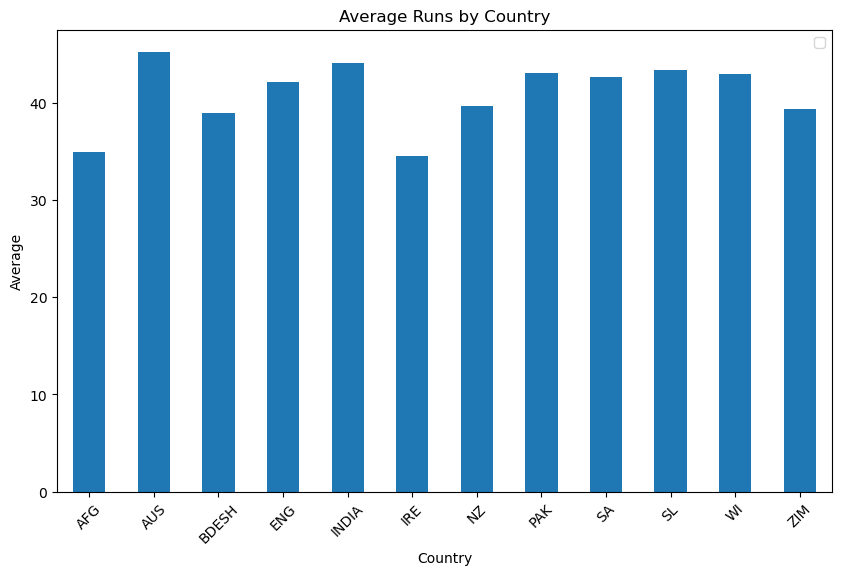

In [34]:
# Plotting the bar graph
plt.figure(figsize=(10, 6))
(country_stats['Average Runs']/country_stats['Average Mat']).plot(kind='bar')
plt.title('Average Runs by Country')
plt.xlabel('Country')
plt.ylabel('Average')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

In [35]:
# Representing the data in chart makes it more visually appealing

In [36]:
country_stats['Average_Runs_Per_Player'] = (country_stats['Average Runs'] / country_stats['Average Mat'])
current_stats_sorted = country_stats.sort_values(by='Average_Runs_Per_Player', ascending=False)
print(current_stats_sorted['Average_Runs_Per_Player'])


Country
AUS      45.221743
INDIA    44.020774
SL       43.312223
PAK      43.069032
WI       42.892920
SA       42.624852
ENG      42.127009
NZ       39.658711
ZIM      39.315431
BDESH    38.882855
AFG      34.886364
IRE      34.548387
Name: Average_Runs_Per_Player, dtype: float64


In [37]:
# Arranging the values in descending order then redrawing the graph

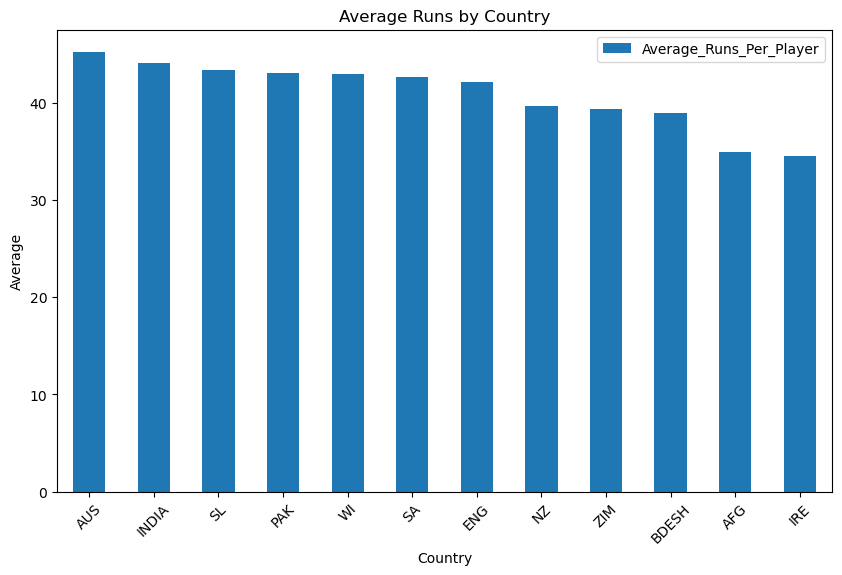

In [38]:
plt.figure(figsize=(10, 6))
current_stats_sorted['Average_Runs_Per_Player'].plot(kind='bar')
plt.title('Average Runs by Country')
plt.xlabel('Country')
plt.ylabel('Average')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

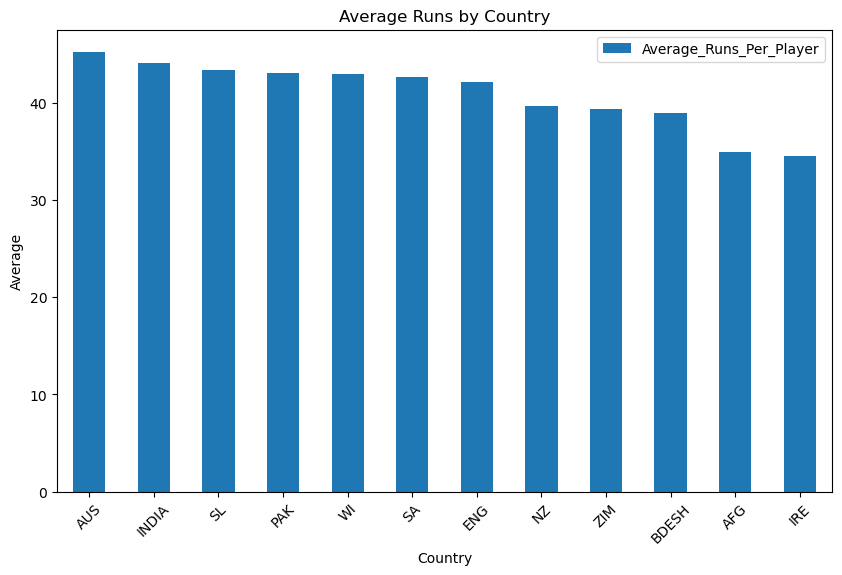

In [39]:
if (df.groupby('Country').agg({'Mat': 'sum'}) > 1000).any().any():
    plt.figure(figsize=(10, 6))
    current_stats_sorted['Average_Runs_Per_Player'].plot(kind='bar')
    plt.title('Average Runs by Country')
    plt.xlabel('Country')
    plt.ylabel('Average')
    plt.xticks(rotation=45)
    plt.legend(loc='upper right')
    plt.show()


# Hypothesis: "There is a positive correlation between a player's batting average and the number of centuries scored in test matches."

In [40]:
df.dropna(subset=["Ave", "100"], inplace=True)
df["Ave"] = pd.to_numeric(df["Ave"], errors="coerce")
df["100"] = pd.to_numeric(df["100"], errors="coerce")

In [41]:
# Drawing the scatterplot to comapre the batting averages and the no of centuries scored

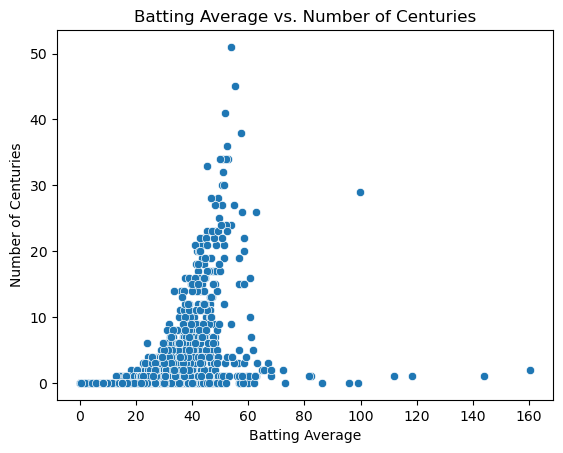

In [42]:
#Scatter plot to visualize the relationship between batting average and number of centuries
sns.scatterplot(x="Ave", y="100", data=df)
#Set x-axis label
plt.xlabel("Batting Average")
#Set y-axis label
plt.ylabel("Number of Centuries")
#Set plot title
plt.title("Batting Average vs. Number of Centuries")
#Display the plot
plt.show()

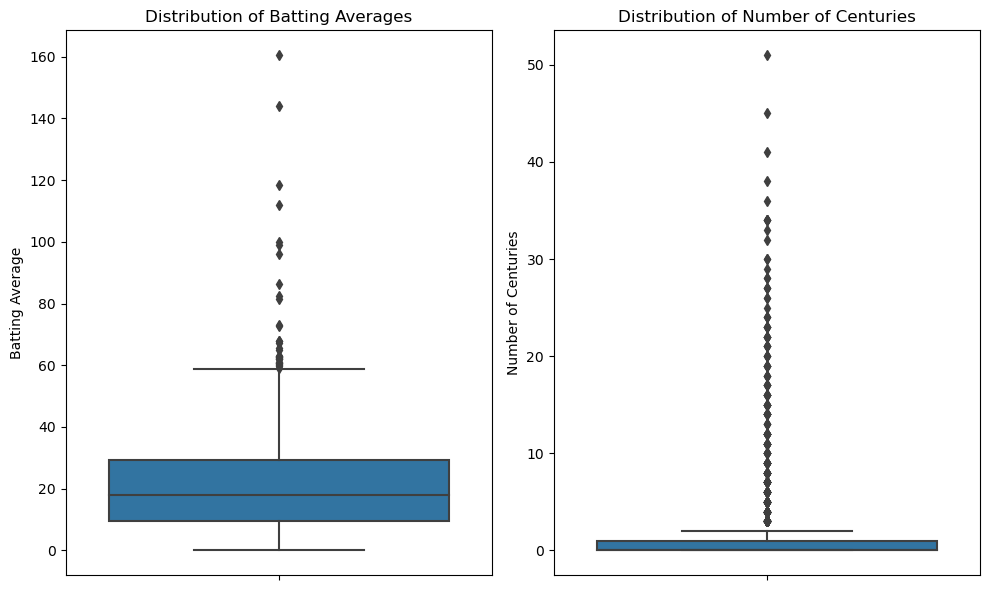

In [43]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y="Ave", data=df)
plt.ylabel("Batting Average")
plt.title("Distribution of Batting Averages")

plt.subplot(1, 2, 2)
sns.boxplot(y="100", data=df)
plt.ylabel("Number of Centuries")
plt.title("Distribution of Number of Centuries")

plt.tight_layout()
plt.show()


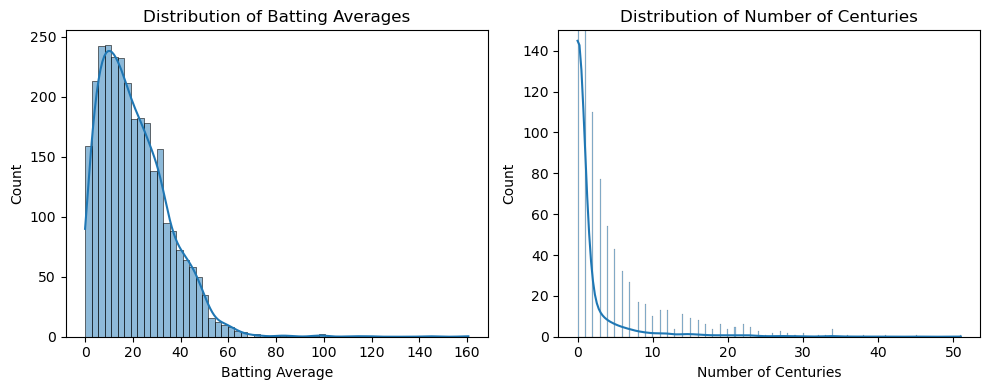

In [44]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df["Ave"], kde=True)
plt.xlabel("Batting Average")
plt.ylabel("Count")
plt.title("Distribution of Batting Averages")

plt.subplot(1, 2, 2)
sns.histplot(df["100"], kde=True)
plt.xlabel("Number of Centuries")
plt.ylabel("Count")
plt.title("Distribution of Number of Centuries")
plt.ylim(0, 150)  # Adjust the limits of the y-axis as per your preference

plt.tight_layout()
plt.show()


In [45]:
correlation = df["Ave"].corr(df["100"])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.52148189418963


In [46]:
# Pearson correlation test.
# The Pearson correlation coefficient measures the strength and direction of the linear relationship between two variables.
#It ranges from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, 
#and 0 indicates no correlation.
corr, p_value = pearsonr(df["Ave"], df["100"])
corr = round(corr, 3)
print("Correlation coefficient:", corr)
print("P-value:", p_value)

Correlation coefficient: 0.521
P-value: 8.65989815382818e-202


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11216\567129977.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_periods_avg = df.groupby(["Debut_Year", "Retirement_Year"]).mean()["Ave"]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11216\567129977.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_periods_centuries = df.groupby(["Debut_Year", "Retirement_Year"]).sum()["100"]


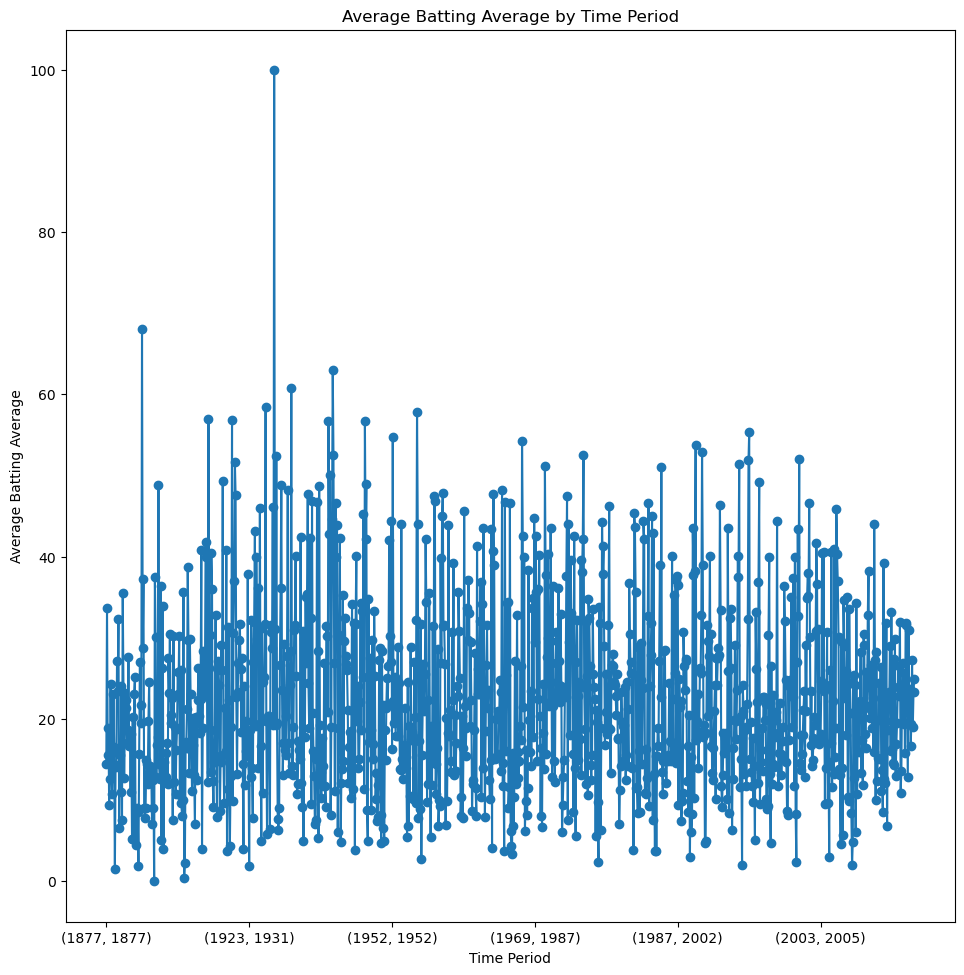

In [47]:
# Extract the year from the "Debut" and "Retirement" columns
df["Debut_Year"] = pd.to_datetime(df["Debut"]).dt.year
df["Retirement_Year"] = pd.to_datetime(df["Retirement"]).dt.year

# Group data by time periods and calculate average batting average and number of centuries
time_periods_avg = df.groupby(["Debut_Year", "Retirement_Year"]).mean()["Ave"]
time_periods_centuries = df.groupby(["Debut_Year", "Retirement_Year"]).sum()["100"]

# Create line plots to visualize the trends
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
time_periods_avg.plot(marker="o")
plt.xlabel("Time Period")
plt.ylabel("Average Batting Average")
plt.title("Average Batting Average by Time Period")


plt.tight_layout(pad=-20.0)
plt.show()


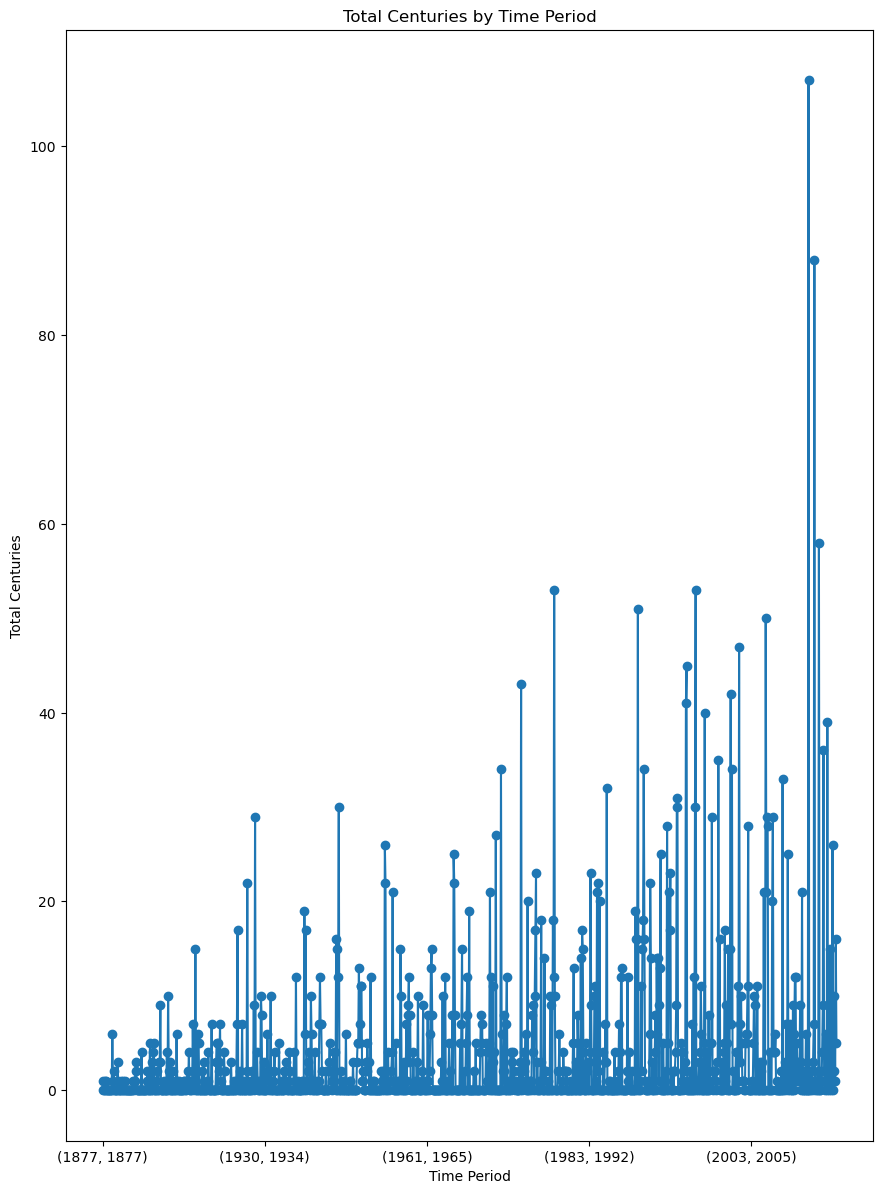

In [48]:
plt.subplot(1, 2, 2)
time_periods_centuries.plot(marker="o")
plt.xlabel("Time Period")
plt.ylabel("Total Centuries")
plt.title("Total Centuries by Time Period")

plt.tight_layout(pad=-25.0)
plt.show()

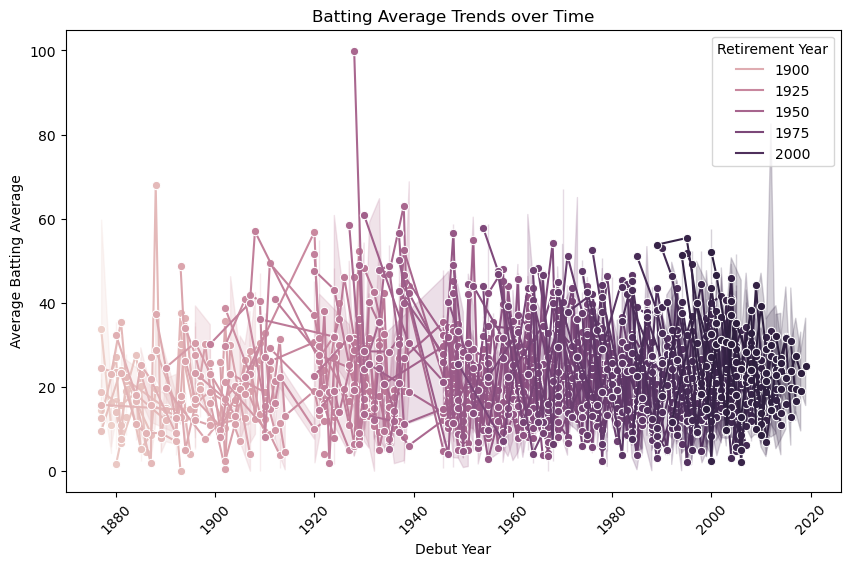

In [49]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Debut_Year", y="Ave", hue="Retirement_Year", marker='o')
plt.xlabel("Debut Year")
plt.ylabel("Average Batting Average")
plt.title("Batting Average Trends over Time")
plt.legend(title="Retirement Year")
plt.xticks(rotation=45)
plt.show()

In [50]:
grouped_data = df.groupby('Country')
# Create an empty list to store the groups
groups = []

# Iterate over each unique country in the 'Country' column
for country in df['Country'].unique():
    groups.append(grouped_data.get_group(country)['Ave'])
# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(*groups)
print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 2.918667919022175
P-value: 0.0007690221328205621


# Hypothesis: "There is a positive correlation between a player's batting average and the number of Half-centuries scored in test matches."

In [51]:
#  Data Cleaning 
df['50'] = df['50'].astype(int)

In [52]:
# Summary Statistics

In [53]:
print(df[['Ave', '50']].describe())


               Ave           50
count  2897.000000  2897.000000
mean     20.553424     3.504315
std      14.567335     7.749314
min       0.000000     0.000000
25%       9.500000     0.000000
50%      18.000000     0.000000
75%      29.180000     3.000000
max     160.500000    68.000000


In [54]:
# Creating a histogram to find the distribution of frequency over Battting average 

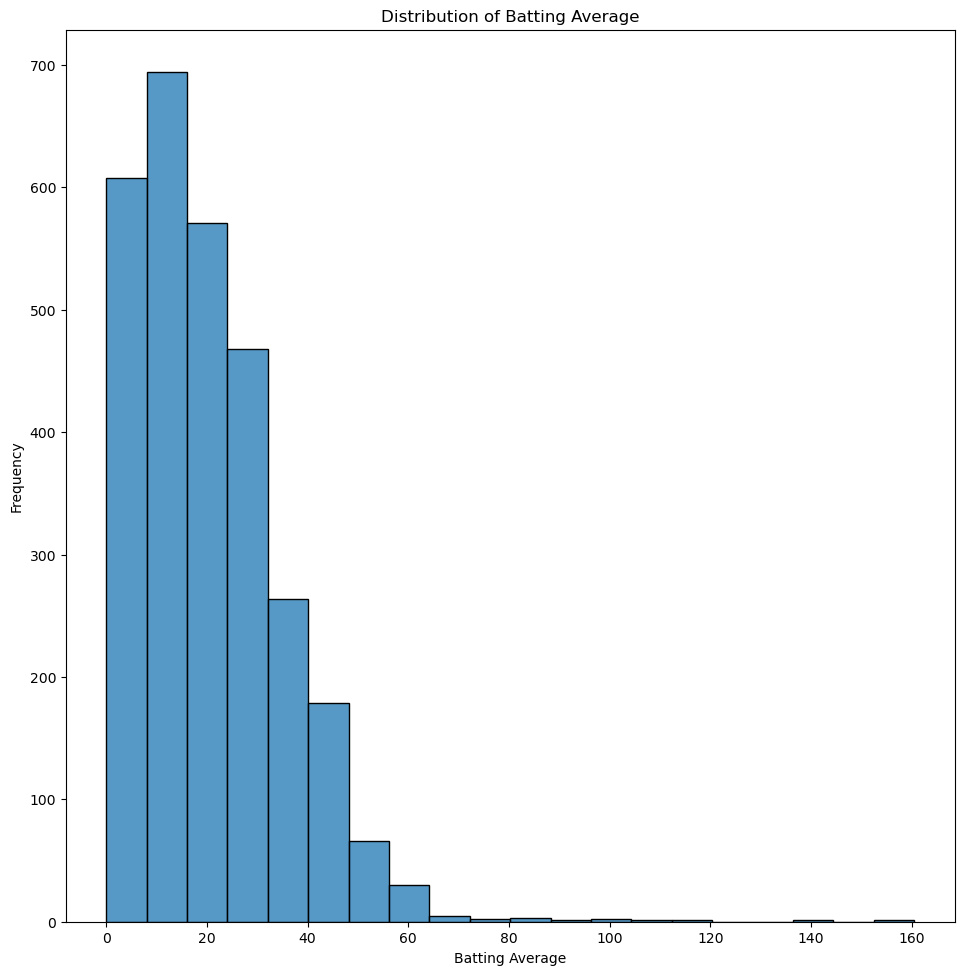

In [55]:
# Data Visualization
# Histogram - Batting Average
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Ave'], bins=20)
plt.xlabel("Batting Average")
plt.ylabel("Frequency")
plt.title("Distribution of Batting Average")
plt.tight_layout(pad=-20.0)
plt.show()


In [56]:
# Creating a histogram to find the distribution of frequency over the number of half centuries

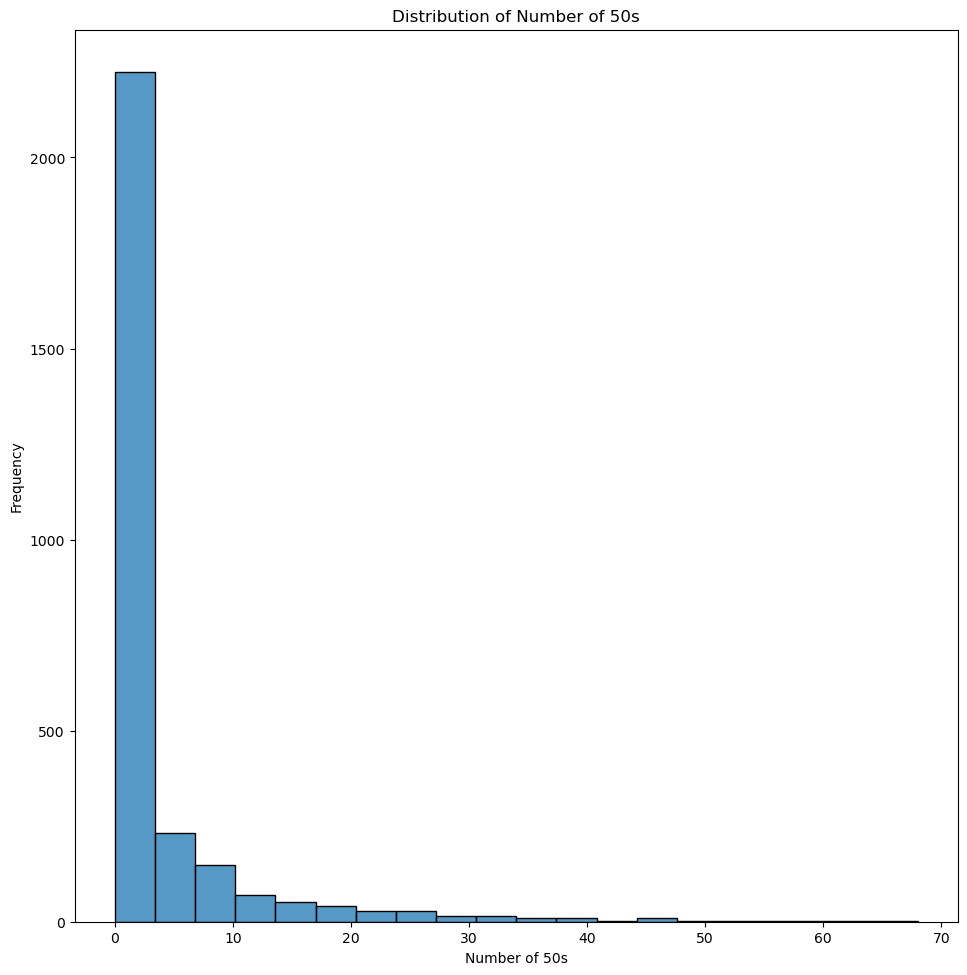

In [57]:
# Histogram - Number of 50s
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['50'], bins=20)
plt.xlabel("Number of 50s")
plt.ylabel("Frequency")
plt.title("Distribution of Number of 50s")
plt.tight_layout(pad=-20.0)
plt.show()


In [58]:
# Drawing the scatterplot to comapre the batting averages and the no of centuries scored

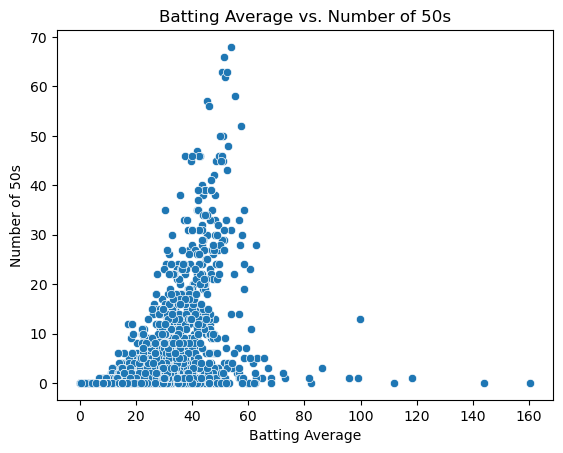

In [59]:
# Scatter Plot - Batting Average vs. Number of 50s
sns.scatterplot(x="Ave", y="50", data=df)
plt.xlabel("Batting Average")
plt.ylabel("Number of 50s")
plt.title("Batting Average vs. Number of 50s")
plt.show()


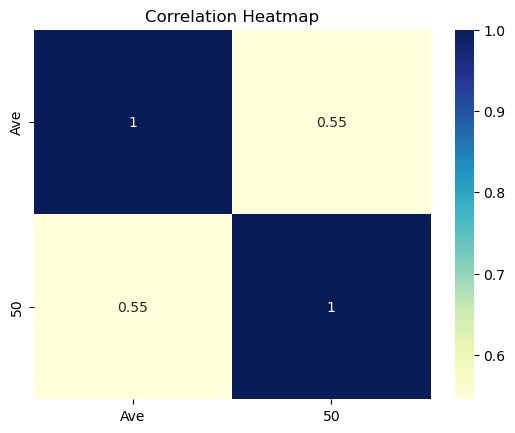

In [60]:
# Correlation Heatmap
correlation_matrix = df[['Ave', '50']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

In [61]:
# Correlation Analysis
correlation, p_value = pearsonr(df['Ave'], df['50'])
print("Correlation coefficient:", correlation)
print("P-value:", p_value)


Correlation coefficient: 0.5454644116115692
P-value: 2.66930464467868e-224


In [62]:
groups = []

# Iterate over each unique country in the 'Country' column
for country in df['Country'].unique():
    groups.append(df[df['Country'] == country]['50'])

# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(*groups)
print("F-statistic:", f_statistic)
print("P-value:", p_value)


F-statistic: 2.067007208683611
P-value: 0.01958338289382151


In [63]:
# Grouping Players by Team
grouped_data = df.groupby('Country')
average_average = grouped_data['Ave'].mean()
average_50s = grouped_data['50'].mean()


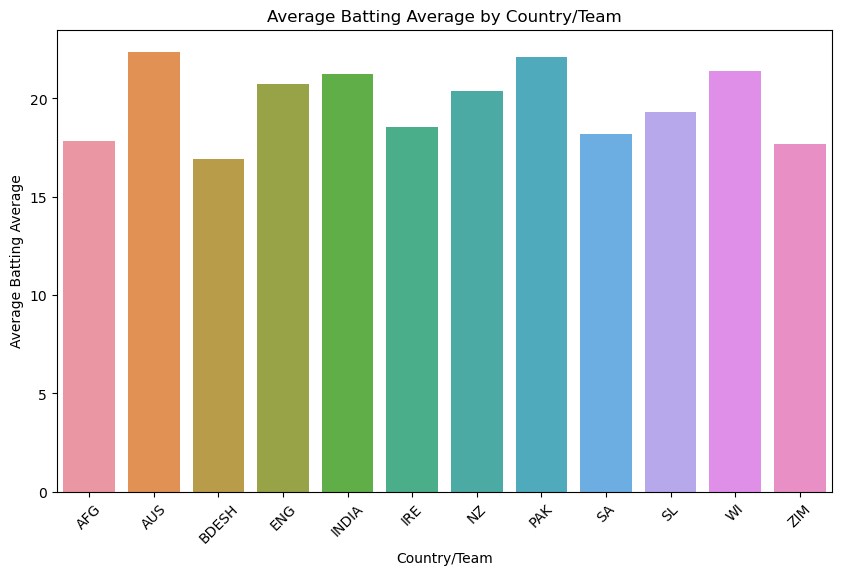

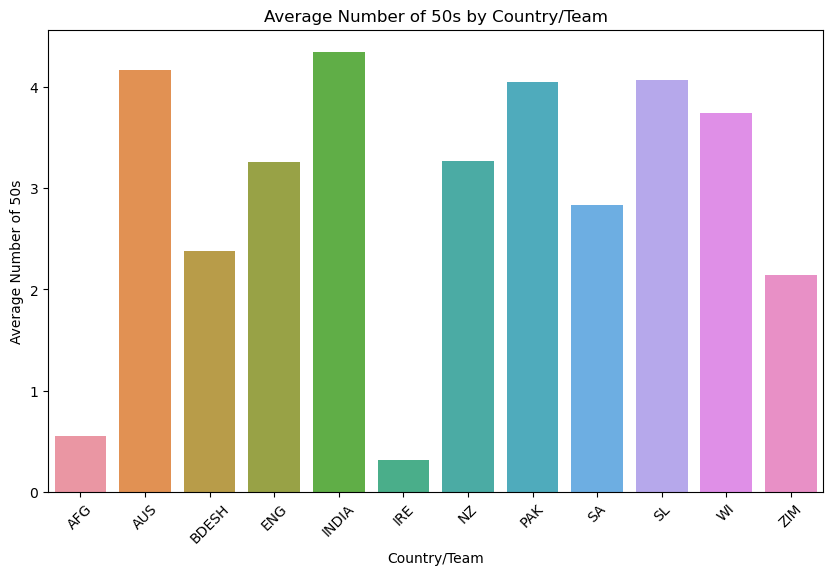

In [64]:
# Visualizing Group-Level Analysis
plt.figure(figsize=(10, 6))
sns.barplot(x=average_average.index, y=average_average.values)
plt.xlabel("Country/Team")
plt.ylabel("Average Batting Average")
plt.title("Average Batting Average by Country/Team")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=average_50s.index, y=average_50s.values)
plt.xlabel("Country/Team")
plt.ylabel("Average Number of 50s")
plt.title("Average Number of 50s by Country/Team")
plt.xticks(rotation=45)
plt.show()


In [65]:
# Statistical Comparison
grouped_data = df.groupby('Country')
# Create an empty list to store the groups
groups = []
# Iterate over each unique country in the 'Country' column
for country in df['Country'].unique():
    groups.append(grouped_data.get_group(country)['50'])
# Convert 'Country' column to categorical type
df['Country'] = pd.Categorical(df['Country'])
# Perform one-way ANOVA test for each group
for i in range(len(groups)):
    for j in range(i+1, len(groups)):
        group1 = groups[i]
        group2 = groups[j]
        f_statistic, p_value = f_oneway(group1, group2)
        print("Comparison between", df['Country'].unique()[i], "and", df['Country'].unique()[j])
        print("F-statistic:", f_statistic)
        print("P-value:", p_value)
        print()


Comparison between AFG and AUS
F-statistic: 3.3119844633200204
P-value: 0.06943621910871589

Comparison between AFG and BDESH
F-statistic: 2.06473877276816
P-value: 0.15355352775830217

Comparison between AFG and ENG
F-statistic: 2.2646248680996823
P-value: 0.13281919309648632

Comparison between AFG and INDIA
F-statistic: 2.982045618478144
P-value: 0.08525036168930313

Comparison between AFG and NZ
F-statistic: 3.262623364313399
P-value: 0.07192311526921448

Comparison between AFG and PAK
F-statistic: 3.488343019528314
P-value: 0.06303666863565799

Comparison between AFG and SA
F-statistic: 1.8830379798388495
P-value: 0.17087820787298194

Comparison between AFG and SL
F-statistic: 2.7710834477582194
P-value: 0.09790224682571981

Comparison between AFG and WI
F-statistic: 2.5906238386435714
P-value: 0.10846290568634744

Comparison between AFG and IRE
F-statistic: 0.8954882924043402
P-value: 0.3510857484696318

Comparison between AFG and ZIM
F-statistic: 2.512444461325301
P-value: 0.115